# Configuration

In [1]:
db_name = 'sitcoms.db'
OHCO = ['show_num', 'seas_num', 'epis_num', 'sent_num', 'token_num']
shows = ['The Office', 'Parks and Recreation']
bound = 186

# Libraries

In [2]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# Process

In [3]:
with sqlite3.connect(db_name) as db:
    V = pd.read_sql('SELECT * FROM vocab', db, index_col='term_id')
    P = pd.read_sql('SELECT * FROM docpair', db)
    D = pd.read_sql('SELECT * FROM doc', db, index_col=OHCO[:3])
    TFIDF = pd.read_sql("SELECT * FROM tfidf_small", db, \
                        index_col=OHCO[:3]+['term_id'])
P.doc_x = P.doc_x.apply(lambda x: eval(x), 1) # convert strings
P.doc_y = P.doc_y.apply(lambda x: eval(x), 1) # back to tuples
P = P.set_index(['doc_x', 'doc_y'])
TFIDF = TFIDF.unstack()
TFIDF.columns = TFIDF.columns.droplevel(0)

# PCA

In [4]:
tfidf = TFIDF.values
vocab_idx = TFIDF.columns
titles = D.title.tolist()

In [5]:
pca = PCA(n_components=10)
comp = pca.fit_transform(normalize(tfidf, norm='l2'))
var = pca.explained_variance_ratio_
print(var)

[0.03509736 0.01860196 0.0152959  0.01461212 0.01270405 0.0117459
 0.01135814 0.01098284 0.01029887 0.01013886]


In [6]:
# I use the convention that PCs start with 1
def plot_pcs(pc1, pc2):
    pc1 -= 1
    pc2 -= 1
    plt.figure(figsize=(10,8))
    plt.plot(comp[:bound,pc1], comp[:bound,pc2], 'o', label='The Office')
    plt.plot(comp[bound:,pc1], comp[bound:,pc2], 'o', label='Parks and Recreation')
    plt.xlabel('PC' + str(pc1+1) + ' (%.1f' %(var[pc1]*100.) + '%)', size=16)
    plt.ylabel('PC' + str(pc2+1) + ' (%.1f' %(var[pc2]*100.) + '%)', size=16)
    plt.legend(loc='best', numpoints=1, fancybox=True)

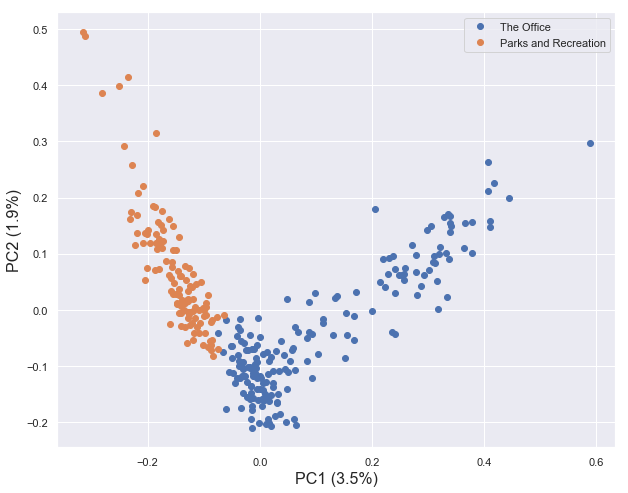

In [7]:
plot_pcs(1,2)

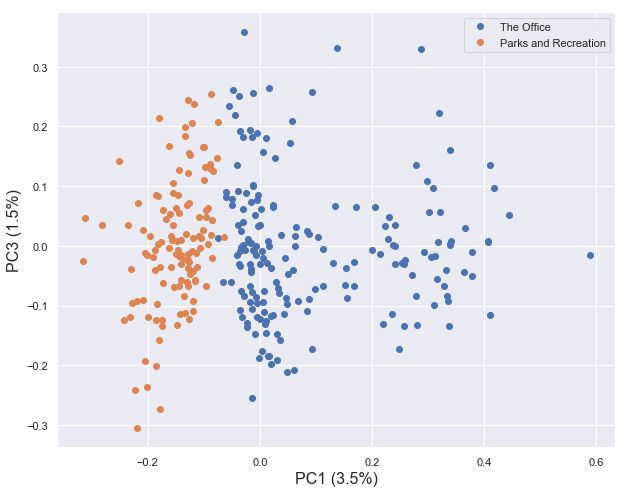

In [8]:
plot_pcs(1,3)

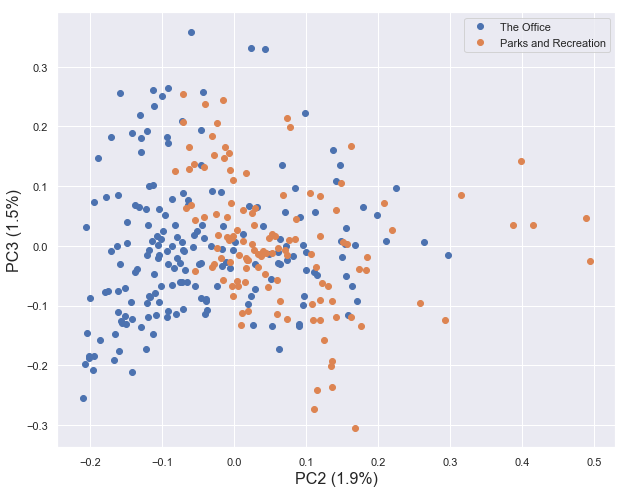

In [9]:
plot_pcs(2,3)

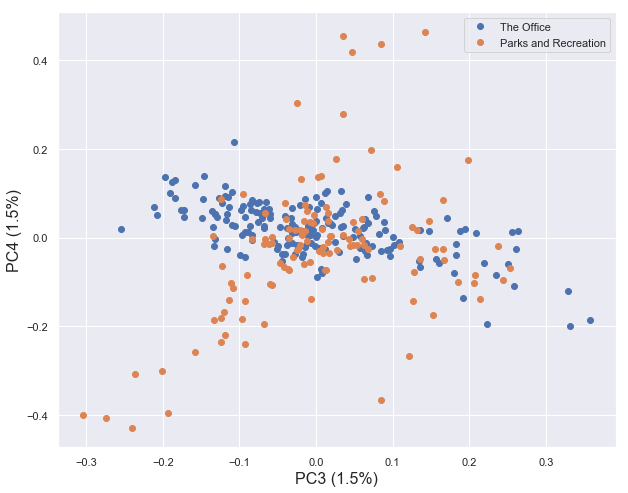

In [10]:
plot_pcs(3,4)

# PC loadings

In [11]:
COMPS = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_))
COMPS.columns = ["PC{}".format(i+1) for i in COMPS.columns]
COMPS.index = vocab_idx
vshort = V.loc[vocab_idx]
vshort = pd.concat([vshort, COMPS], axis=1)

In [12]:
vshort.sort_values('PC1', ascending=False)[['term_str','PC1']]
# business versus government

,term_str,PC1
term_id,,
15577,ok,0.132404
9614,god,0.014799
2844,branch,0.014356
812,alright,0.014246
23800,um,0.013315
3749,cause,0.011203
19414,sales,0.011129
5193,corporate,0.010078
23807,umm,0.009540


In [13]:
vshort.sort_values('PC2', ascending=False)[['term_str','PC2']]
# also business versus government, but opposite direction

,term_str,PC2
term_id,,
15577,ok,0.056235
16194,park,0.046865
16816,pit,0.042252
9732,government,0.019911
16200,parks,0.018134
3444,campaign,0.016066
4261,city,0.013892
24610,vote,0.013001
17551,project,0.010231


In [14]:
vshort.sort_values('PC3', ascending=False)[['term_str','PC3']]
# life versus work

,term_str,PC3
term_id,,
16239,party,0.051021
2311,birthday,0.031694
24888,wedding,0.022006
3370,cake,0.019495
23176,tonight,0.012935
13737,married,0.012151
12589,la,0.011694
16816,pit,0.010937
9477,gift,0.010687


In [15]:
vshort.sort_values('PC4', ascending=False)[['term_str','PC4']]
# no obvious interpretation

,term_str,PC4
term_id,,
16816,pit,0.049152
16194,park,0.028784
16140,paper,0.010948
8340,fell,0.010350
4376,clients,0.009207
9332,gay,0.008944
19414,sales,0.008354
1792,band,0.007558
19415,salesman,0.007499


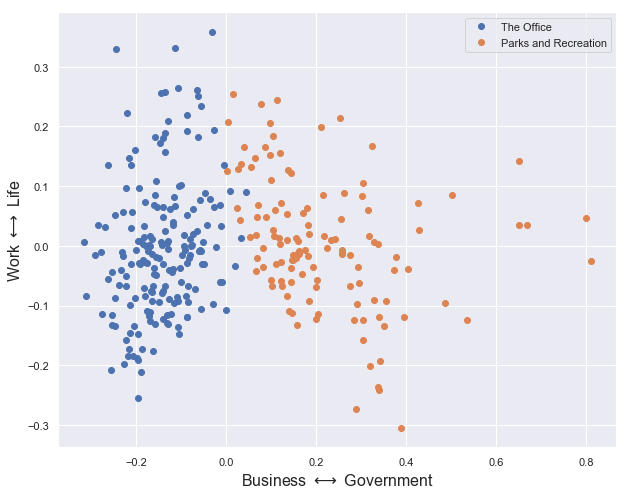

In [16]:
plt.figure(figsize=(10,8))
# combine PC1 and PC2 since they represent the same concept
# subtraction because they have opposite directions
plt.plot(comp[:bound,1] - comp[:bound,0], comp[:bound,2], 'o', label='The Office')
plt.plot(comp[bound:,1] - comp[bound:,0], comp[bound:,2], 'o', label='Parks and Recreation')
plt.xlabel('Business $\longleftrightarrow$ Government', size=16) # add interpretations
plt.ylabel('Work $\longleftrightarrow$ Life', size=16) # as axes labels
plt.legend(loc='best', numpoints=1, fancybox=True)
pass

# Explore Similar Episodes
To a given episode, ordered by cosine similarity using the full TFIDF matrix as computed in TextmanVectorSpaceMaker. Also includes PCA visualization.

`show_num = 1` is The Office, and `show_num = 2` is Parks and Recreation. Follow the season and episode conventions at 
1. http://officequotes.net/
2. https://www.springfieldspringfield.co.uk/episode_scripts.php?tv-show=parks-and-recreation

In [17]:
def sim_eps(show_num, seas_num, epis_num, n=10):
    show_num -= 1
    seas_num -= 1
    epis_num -= 1
    tup = (show_num, seas_num, epis_num)
    title = D.loc[tup].title
    ind = titles.index(title)
    msg = 'Listing the {} '.format(n) + 'most similar episodes to:\n' + \
          shows[show_num] + ' Season {} Episode {} - '.format(seas_num + 1, epis_num + 1) + \
          title + '\n'
    print(msg)
    
    T1 = P.loc[tup].sort_values(by='cosine', ascending=False).head(n)
    T2 = D.loc[T1.index]
    T1 = T1.reset_index().drop('doc_y', 1)
    T2 = T2.reset_index().drop(['term_count', 'tf'], 1)
    S = T1.join(T2)
    S = S.rename(columns={'show_num': 'Show', 'seas_num': 'Season', 'epis_num': 'Episode', \
                           'title': 'Title', 'cosine': 'Similarity'})
    S.Season = S.Season + 1
    S.Episode = S.Episode + 1
    S.Show = S.Show.apply(lambda x: shows[x], 1)
    S.index = S.index + 1
    display(S)
    
    plt.figure(figsize=(10,8))
    plt.plot(comp[:bound,1] - comp[:bound,0], comp[:bound,2], 'o', label='The Office')
    plt.plot(comp[bound:,1] - comp[bound:,0], comp[bound:,2], 'o', label='Parks and Recreation')
    plt.plot(comp[ind,1] - comp[ind,0], comp[ind,2], color='lime', \
             linestyle='none', fillstyle='none', marker='o', markersize=14, label=title)
    plt.xlabel('Business $\longleftrightarrow$ Government', size=16)
    plt.ylabel('Work $\longleftrightarrow$ Life', size=16)
    plt.legend(loc='best', numpoints=1, fancybox=True)

Listing the 10 most similar episodes to:
The Office Season 3 Episode 15 - Phyllis' Wedding



,Similarity,Show,Season,Episode,Title
1,0.183742,Parks and Recreation,5,14,Leslie and Ben
2,0.173953,The Office,6,4,Niagara
3,0.141656,Parks and Recreation,3,9,Andy and April's Fancy Party
4,0.131444,The Office,9,23,Finale
5,0.127991,Parks and Recreation,7,7,Donna & Joe
6,0.109973,The Office,2,17,Dwight's Speech
7,0.095083,The Office,5,1,Weight Loss
8,0.084293,Parks and Recreation,6,1,London Part 1 & 2
9,0.084213,Parks and Recreation,7,6,Save JJ's
10,0.083284,The Office,6,2,The Meeting


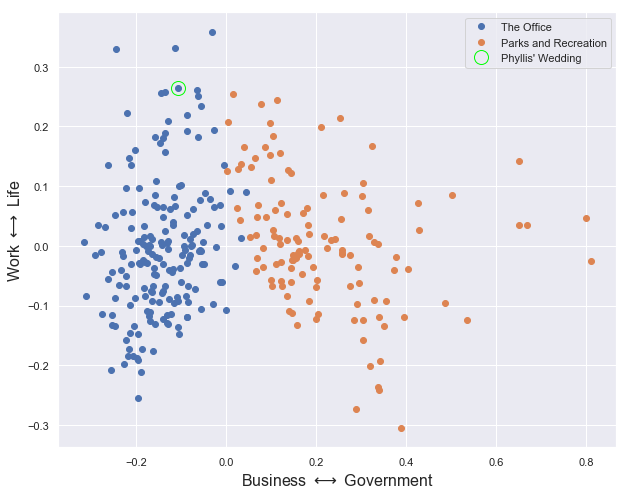

In [18]:
sim_eps(1,3,15)
# weddings

Listing the 10 most similar episodes to:
The Office Season 2 Episode 1 - The Dundies



,Similarity,Show,Season,Episode,Title
1,0.361402,Parks and Recreation,2,17,Woman of the Year
2,0.282035,The Office,7,20,Michael's Last Dundies
3,0.129829,Parks and Recreation,6,1,London Part 1 & 2
4,0.117508,Parks and Recreation,1,5,The Banquet
5,0.112795,Parks and Recreation,5,9,Ron and Diane
6,0.108147,The Office,4,9,Dinner Party
7,0.058817,The Office,7,21,Goodbye Michael
8,0.054511,Parks and Recreation,5,5,Halloween Surprise
9,0.053728,The Office,2,2,Sexual Harassment
10,0.052931,The Office,4,14,Goodbye Toby


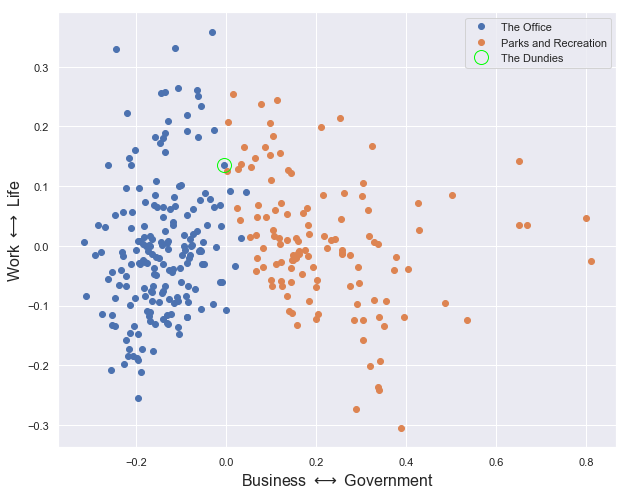

In [19]:
sim_eps(1,2,1)
# award ceremonies

Listing the 10 most similar episodes to:
Parks and Recreation Season 4 Episode 9 - Trial of Leslie Knope



,Similarity,Show,Season,Episode,Title
1,0.109873,Parks and Recreation,1,4,Boys' Club
2,0.109354,The Office,5,2,Business Ethics
3,0.094570,Parks and Recreation,5,17,Partridge
4,0.093238,The Office,4,8,The Deposition
5,0.087375,The Office,7,11,Classy Christmas
6,0.076125,Parks and Recreation,3,14,Road Trip
7,0.075954,Parks and Recreation,5,18,Animal Control
8,0.075859,Parks and Recreation,6,4,Gin It Up!
9,0.074245,Parks and Recreation,5,5,Halloween Surprise
10,0.074234,Parks and Recreation,6,1,London Part 1 & 2


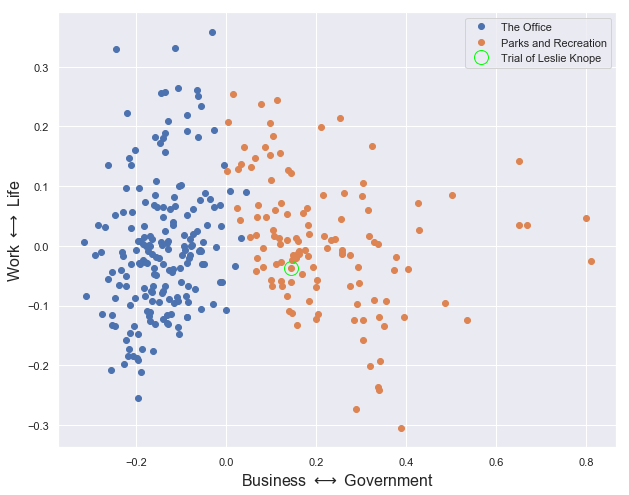

In [20]:
sim_eps(2,4,9)
# dealing with consequences

Listing the 10 most similar episodes to:
The Office Season 1 Episode 1 - Pilot (The Office)



,Similarity,Show,Season,Episode,Title
1,0.239156,The Office,1,4,The Alliance
2,0.121224,The Office,3,10,A Benihana Christmas
3,0.089486,The Office,3,7,Branch Closing
4,0.084831,The Office,7,24,Search Committee
5,0.077239,The Office,4,2,Dunder Mifflin Infinity
6,0.075786,The Office,2,6,The Fight (The Office)
7,0.074993,The Office,2,7,The Client
8,0.073252,The Office,1,5,Basketball
9,0.072039,The Office,2,16,Valentine's Day
10,0.071298,The Office,3,3,The Coup


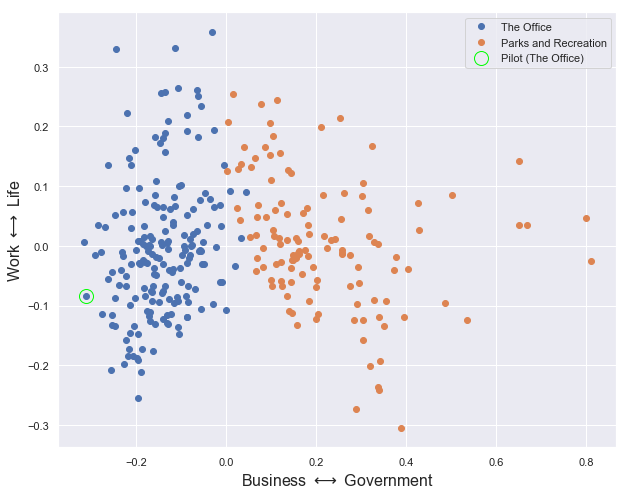

In [21]:
sim_eps(1,1,1)
# pilot

Listing the 10 most similar episodes to:
Parks and Recreation Season 1 Episode 1 - Pilot (Parks and Recreation)



,Similarity,Show,Season,Episode,Title
1,0.277725,Parks and Recreation,1,6,Rock Show
2,0.245150,Parks and Recreation,1,2,Canvassing
3,0.225417,Parks and Recreation,1,3,The Reporter
4,0.184572,Parks and Recreation,2,5,Sister City
5,0.170228,Parks and Recreation,2,6,KaBOOM!
6,0.130326,Parks and Recreation,3,14,Road Trip
7,0.128935,Parks and Recreation,1,4,Boys' Club
8,0.122038,Parks and Recreation,5,7,Leslie vs April
9,0.097067,Parks and Recreation,4,8,Smallest Park
10,0.093315,Parks and Recreation,5,12,Ann's Decision


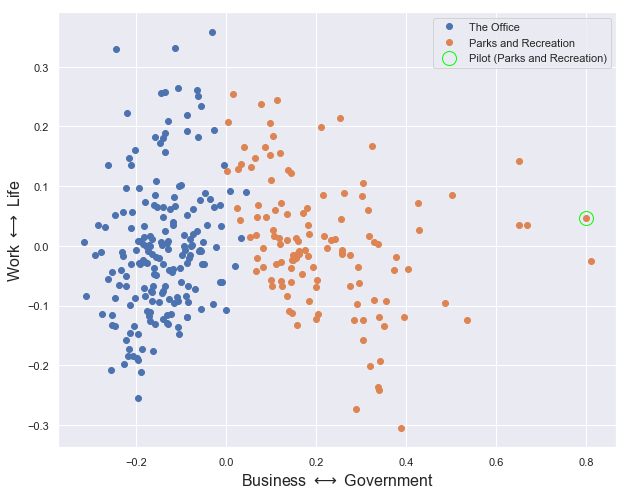

In [22]:
sim_eps(2,1,1)
# pilot

## Have fun playing around! But not too much,
<img src='amok.png'>